# Lab 6-1  Temperature gradients in and below the snow

This lab was actually written by Jessica, based on the prior labs by Eli Schwat and Danny Hogan.   May 2023

In [1]:
# import libraries we'll need
import urllib
import pandas as pd
import datetime as dt
import xarray as xr
import matplotlib.pyplot as plt
import os
%matplotlib inline

## User-provided inputs

Here we define a few variables to be used in the notebook. You may or may not want to change these values.

In [2]:
# Provide the path to a directory you want to download the SoS files to
download_directory = './sosnoqc/'

# Provide a the start and end dates you want to download
start_date = '20230131'
end_date = '20230202'

# Provide the specific variables you want to extract from the dataset.
# We provide these in advance because the datasets are very large and, 
# when we open them, we want to immediately extract only the data we want.
# Right now we want the temperature recordings from in the snowpack... or we hope are in the snowpack...
# These are available next to the upwind (uw) tower and the downwind (d) tower.
# We also measure soil temperature at xx depths at the downwind tower 
# For comparison, we also download the 2 m air temperature from the central tower (c).
VARIABLES = [
    'Tsnow_0_4m_uw',
    'Tsnow_0_5m_uw',
    'Tsnow_0_6m_uw',
    'Tsnow_0_7m_uw',
    'Tsnow_0_8m_uw',
    'Tsnow_0_9m_uw',
    'Tsnow_1_0m_uw',
    'Tsnow_1_1m_uw',
    'Tsnow_1_2m_uw',
    'Tsnow_1_3m_uw',
    'Tsnow_1_4m_uw',
    'Tsnow_1_5m_uw',
    'Tsoil_0_6cm_d',
    'Tsoil_1_9cm_d',
    'Tsoil_3_1cm_d',
    'Tsoil_4_4cm_d',
    'Tsoil_8_1cm_d',
    'Tsoil_9_4cm_d',
    'Tsoil_10_6cm_d',
    'Tsoil_11_9cm_d',
    'Tsoil_18_1cm_d',
    'Tsoil_19_4cm_d',
    'Tsoil_20_6cm_d',
    'Tsoil_21_9cm_d',
    'Tsoil_28_1cm_d',
    'Tsoil_29_4cm_d',
    'Tsoil_30_6cm_d',
    'Tsoil_31_9cm_d',
    'Tsnow_0_4m_d',
    'Tsnow_0_5m_d',
    'Tsnow_0_6m_d',
    'Tsnow_0_7m_d',
    'Tsnow_0_8m_d',
    'Tsnow_0_9m_d',
    'Tsnow_1_0m_d',
    'Tsnow_1_1m_d',
    'Tsnow_1_2m_d',
    'Tsnow_1_3m_d',
    'Tsnow_1_4m_d',
    'Tsnow_1_5m_d',
    'T_2m_c',
]

### Download SoS NetCDF files from an NCAR FTP server

Define a function for downloading daily SoS NetCDF filesm

In [3]:
def download_sos_data_day(date, local_download_dir, cache=True):
    """Download a netcdf file from the ftp url provided by the Earth Observing 
    Laboratory at NCAR. Data comes in one NetCDF file per day, Reynolds-Averaged 
    with a 5-minute averaging period.

    Args:
        date (str, optional): String representing a date in format '%Y%m%d'. Defaults to '20221101'.
        local_download_dir (str, optional): Directory to which files will be downloaded. Defaults 
                    to 'sosnoqc'; this directory will be created if it  does not already exist.
        cache (bool, optional): If True, looks in `local_download_dir` for requested  file, if it 
                    exists, does not redownload file. If False, downloads file from the FTP server.

    Returns:
        _type_: Relative path to the downloaded file
    """
    base_url = 'ftp.eol.ucar.edu'
    path = 'pub/archive/isfs/projects/SOS/netcdf/noqc_geo'
    file = f'isfs_{date}.nc'
    os.makedirs(local_download_dir, exist_ok=True)
    full_file_path = os.path.join('ftp://', base_url, path, file)
    download_file_path = os.path.join(local_download_dir, file)
    if cache and os.path.isfile(download_file_path):
        print(f"Caching...skipping download for {date}")
    else:
        urllib.request.urlretrieve(
            full_file_path,
            download_file_path   
        )
    return download_file_path

Use the function defined above to download all the files we specified. When you run the cell below this comment, this will ~3-5 minutes if you are downloading more than a few days.

In [4]:
# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = pd.date_range(
    dt.datetime.strptime(start_date, '%Y%m%d'),
    dt.datetime.strptime(end_date, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

# Download one daily file for each date in the datelist. 
# cache = True so that when we rerun the notebook in the future, we don't have to redownload the data.
files = [download_sos_data_day(date, download_directory, cache=True) for date in datelist]

Caching...skipping download for 20230131
Caching...skipping download for 20230201
Caching...skipping download for 20230202


### Open and and concatenate SoS datasets with Xarray

Note that as we open each individual file, we extract only the VARIABLES we defined above.  This may also take some time.

In [5]:
# Open up one day's dataset. We open this single dataset and keep all variables, so we can check out all that is available
example_complete_dataset = xr.open_dataset(files[0])

# Open up datasets from every day, extracting our VARIABLES of choice as we open individual datasets. This is so that we have a smaller dataset held 
# in computer memory.
all_datasets = [xr.open_dataset(file)[VARIABLES] for file in files]
sos_dataset = xr.concat(all_datasets, dim='time')

#### Check out our SoS dataset

Note that our `dataset` has just the variables we are defined. Note that `example_complete_dataset` has 1047 variables.

In [6]:
sos_dataset

<xarray.Dataset>
Dimensions:         (time: 864)
Coordinates:
  * time            (time) datetime64[ns] 2023-01-31T00:02:30 ... 2023-02-02T...
Data variables: (12/41)
    Tsnow_0_4m_uw   (time) float32 -2.578 -2.578 -2.578 ... -2.453 -2.453 -2.453
    Tsnow_0_5m_uw   (time) float32 -3.256 -3.255 -3.255 ... -3.144 -3.144 -3.144
    Tsnow_0_6m_uw   (time) float32 -3.392 -3.392 -3.391 ... -3.264 -3.264 -3.265
    Tsnow_0_7m_uw   (time) float32 -3.94 -3.94 -3.94 ... -3.934 -3.934 -3.935
    Tsnow_0_8m_uw   (time) float32 -4.425 -4.426 -4.426 ... -4.746 -4.741 -4.742
    Tsnow_0_9m_uw   (time) float32 -4.949 -4.951 -4.952 ... -5.667 -5.655 -5.655
    ...              ...
    Tsnow_1_1m_d    (time) float32 -7.652 -7.725 -7.883 ... -12.85 -11.89 -11.82
    Tsnow_1_2m_d    (time) float32 -7.712 -7.739 -7.943 ... -12.01 -11.0 -10.95
    Tsnow_1_3m_d    (time) float32 -7.627 -7.637 -7.863 ... -11.42 -10.29 -10.21
    Tsnow_1_4m_d    (time) float32 -7.596 -7.6 -7.827 ... -10.94 -9.771 -9.632
    Tsnow_1_5m_d    (time) float32 -7.621 -7.606 -7.843 ... -10.63 -9.445 -9.236
    T_2m_c          (time) float32 -7.659 -7.666 -7.757 ... -8.455 -7.531 -6.869
Attributes:
    history:                   Created: 2023-01-31 00:05:12 +0000\n
    NIDAS_version:             v1.2-1692
    calibration_file_path:     /h/eol/isfs/isfs/projects/SOS/ISFS/cal_files/n...
    project_config:            /h/eol/isfs/isfs/projects/SOS/ISFS/config/sos....
    wind3d_horiz_coordinates:  geographic
    file_length_seconds:       86400
    wind3d_horiz_rotation:     1
    wind3d_tilt_correction:    0

If you click the arrow next to "Data variables" above, you will see that we have timeseries of temperature at different heights above and below the ground surface.  The Tsoil measurements are labeled by cm below the soil surface, where Tsoil_20_6cm_d, is located 20.6 cm deep below the downwind tower.  You can find a description of how all of the soil sensors were deployed [here](https://www.eol.ucar.edu/content/installation-soil-sensors).

The Tsnow sensors were deployed sticking out from a white PVC pipe next to the tower, and they are labeled as height above the ground surface in meters, so Tsnow_0_4m_uw is 0.4 m or 40 cm above the ground next to the upper west tower.  The depth of these sensors in the snow changes with time, and should be cross-referenced with the snow depth timeseries from lab 3.

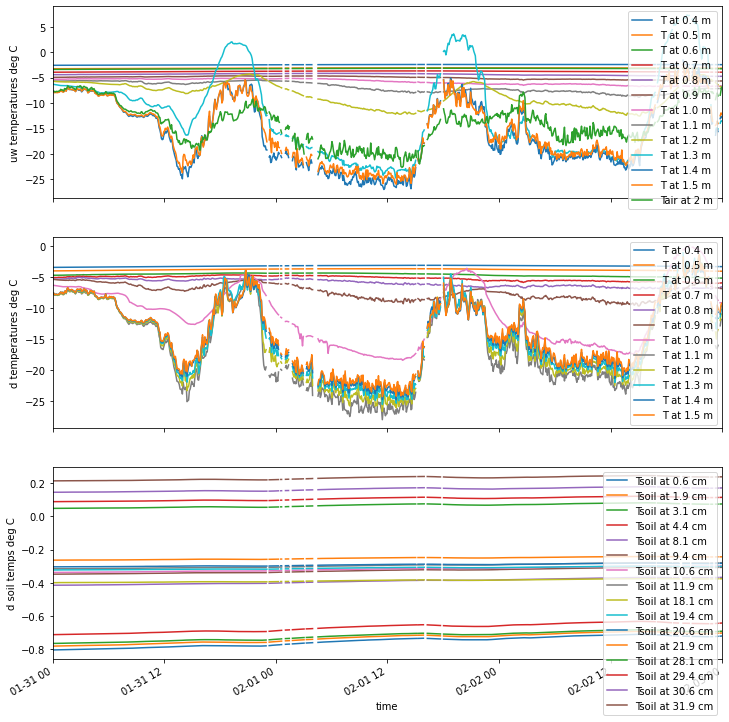

In [10]:
#first, let's make a plot with all of the data, not aggregated to hourly

fig, axes = plt.subplots(3, 1, figsize=(12,12), sharex=True)
sos_dataset['Tsnow_0_4m_uw'].plot(ax=axes[0], label='T at 0.4 m')
sos_dataset['Tsnow_0_5m_uw'].plot(ax=axes[0], label='T at 0.5 m')
sos_dataset['Tsnow_0_6m_uw'].plot(ax=axes[0], label='T at 0.6 m')
sos_dataset['Tsnow_0_7m_uw'].plot(ax=axes[0], label='T at 0.7 m')
sos_dataset['Tsnow_0_8m_uw'].plot(ax=axes[0], label='T at 0.8 m')
sos_dataset['Tsnow_0_9m_uw'].plot(ax=axes[0], label='T at 0.9 m')
sos_dataset['Tsnow_1_0m_uw'].plot(ax=axes[0], label='T at 1.0 m')
sos_dataset['Tsnow_1_1m_uw'].plot(ax=axes[0], label='T at 1.1 m')
sos_dataset['Tsnow_1_2m_uw'].plot(ax=axes[0], label='T at 1.2 m')
sos_dataset['Tsnow_1_3m_uw'].plot(ax=axes[0], label='T at 1.3 m')
sos_dataset['Tsnow_1_4m_uw'].plot(ax=axes[0], label='T at 1.4 m')
sos_dataset['Tsnow_1_5m_uw'].plot(ax=axes[0], label='T at 1.5 m')
# also, add on the 2 m air temperature here for comparison
sos_dataset['T_2m_c'].plot(ax=axes[0], label='Tair at 2 m')

sos_dataset['Tsnow_0_4m_d'].plot(ax=axes[1], label='T at 0.4 m')
sos_dataset['Tsnow_0_5m_d'].plot(ax=axes[1], label='T at 0.5 m')
sos_dataset['Tsnow_0_6m_d'].plot(ax=axes[1], label='T at 0.6 m')
sos_dataset['Tsnow_0_7m_d'].plot(ax=axes[1], label='T at 0.7 m')
sos_dataset['Tsnow_0_8m_d'].plot(ax=axes[1], label='T at 0.8 m')
sos_dataset['Tsnow_0_9m_d'].plot(ax=axes[1], label='T at 0.9 m')
sos_dataset['Tsnow_1_0m_d'].plot(ax=axes[1], label='T at 1.0 m')
sos_dataset['Tsnow_1_1m_d'].plot(ax=axes[1], label='T at 1.1 m')
sos_dataset['Tsnow_1_2m_d'].plot(ax=axes[1], label='T at 1.2 m')
sos_dataset['Tsnow_1_3m_d'].plot(ax=axes[1], label='T at 1.3 m')
sos_dataset['Tsnow_1_4m_d'].plot(ax=axes[1], label='T at 1.4 m')
sos_dataset['Tsnow_1_5m_d'].plot(ax=axes[1], label='T at 1.5 m')

sos_dataset['Tsoil_0_6cm_d'].plot(ax=axes[2], label='Tsoil at 0.6 cm')
sos_dataset['Tsoil_1_9cm_d'].plot(ax=axes[2], label='Tsoil at 1.9 cm')
sos_dataset['Tsoil_3_1cm_d'].plot(ax=axes[2], label='Tsoil at 3.1 cm')
sos_dataset['Tsoil_4_4cm_d'].plot(ax=axes[2], label='Tsoil at 4.4 cm')
sos_dataset['Tsoil_8_1cm_d'].plot(ax=axes[2], label='Tsoil at 8.1 cm')
sos_dataset['Tsoil_9_4cm_d'].plot(ax=axes[2], label='Tsoil at 9.4 cm')
sos_dataset['Tsoil_10_6cm_d'].plot(ax=axes[2], label='Tsoil at 10.6 cm')
sos_dataset['Tsoil_11_9cm_d'].plot(ax=axes[2], label='Tsoil at 11.9 cm')
sos_dataset['Tsoil_18_1cm_d'].plot(ax=axes[2], label='Tsoil at 18.1 cm')
sos_dataset['Tsoil_19_4cm_d'].plot(ax=axes[2], label='Tsoil at 19.4 cm')
sos_dataset['Tsoil_20_6cm_d'].plot(ax=axes[2], label='Tsoil at 20.6 cm')
sos_dataset['Tsoil_21_9cm_d'].plot(ax=axes[2], label='Tsoil at 21.9 cm')
sos_dataset['Tsoil_28_1cm_d'].plot(ax=axes[2], label='Tsoil at 28.1 cm')
sos_dataset['Tsoil_29_4cm_d'].plot(ax=axes[2], label='Tsoil at 29.4 cm')
sos_dataset['Tsoil_30_6cm_d'].plot(ax=axes[2], label='Tsoil at 30.6 cm')
sos_dataset['Tsoil_31_9cm_d'].plot(ax=axes[2], label='Tsoil at 31.9 cm')
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[0].set_ylabel("uw temperatures deg C")
axes[1].set_ylabel("d temperatures deg C")
axes[2].set_ylabel("d soil temps deg C")
axes[0].set_xlim(dt.datetime(2023,1,31), dt.datetime(2023,2,3))
plt.show()

### Analyze the graph

#### Snow T
For reference from the data we looked at in Lab 3, the snow depth at the d and uw towers around 1 February were about 0.95 m and 1.3 m, respectively.  If you look at the graphs above, you can see how well snow insulates.  You can also see that the depth from the lidar doesn't exactly tell you which sensors are above or below the snow.  At the downwind, d, tower, the T at 1.0 m sensor is slightly below the snow surface whereas the T at 1.1 m sensor is slightly above the snow surface.  Do you understand why I say this from the graph?  At the downwind tower, T at 1.3 is very close to the snow surface but also heating up in the sun.  T at 1.2 is below the snow surface, and T at 1.4 is above the snow surface.  

#### Tair
Here, look also at how the Tair at 2 m record differs from the thermistors in the snow near the air.  Why do you think these differences occur?

#### Tsoil
You can also see that the deepest soil temperatures are the warmest -- slightly above freezing.  If you plot another period, such as in November or December before much snow accumulated, you can see much more dramatic soil temperature changes.  Also, you may want to use the code from earlier labs to get an hourly soil temperature dataset and look at how the soil temperatures have evolved over the whole season. 

## BONUS:  Our data lend themselves to studying the thermal conductivy of snow through application of the 1-dimensional heat equation

Here, we examine code provided [here](http://hplgit.github.io/num-methods-for-PDEs/doc/pub/diffu/sphinx/._main_diffu001.html).  This is a commonly solved equation in numerical methods for PDEs.  We are using the simplest method to solve this and it it is far from the best.

Note that the python code below needs help, so this is a challenge exercise for those good at coding.  

In [3]:
K = 0.13 #W/m/deg this is the thermal conductivity of snow at a density of 180 kg/m^3 from Jeff Dozier
ro = 180 #kg/m^2 this is the density of near-surface snow referenced by Jeff
C = 1.9*10**(-3) # specific heat of ice, check if this works or need something else for snow?
a = K/(ro*C) # the thermal diffusivity of snow, which is what we need for the heat equation

T = 3600*24*3 #number of seconds in time (end point of simulation)
Nt = T #I think we want a timestamp every second
L = 1 #we go down to depth of 1 meter
Nx = 100 # we have a vertical simulation resolution of every cm
#I'm thinking of x as like z but starting from the top going down

# we need initial condition of snow temperature with depth
I   = zeros(Nx+1)
for i in range(0, Nx):
    I[i] = 273.15-5 #start with every depth at -5 C, in K so don't have 0 values

# timestepping code from the website
x = linspace(0, L, Nx+1)    # mesh points in space
dx = x[1] - x[0]
t = linspace(0, T, Nt+1)    # mesh points in time
dt = t[1] - t[0]
F = a*dt/dx**2
u   = zeros(Nx+1)           # unknown u at new time level
u_1 = zeros(Nx+1)           # u at the previous time level

# Set initial condition u(x,0) = I(x)
for i in range(0, Nx+1):
    u_1[i] = I(x[i])

for n in range(0, Nt):
    # Compute u at inner mesh points
    for i in range(1, Nx):
        u[i] = u_1[i] + F*(u_1[i-1] - 2*u_1[i] + u_1[i+1])

    # Insert boundary conditions
    u[0] = 0;  u[Nx] = 0

    # Update u_1 before next step
    u_1[:]= u

NameError: name 'zeros' is not defined